# Project 3: Poisonous Mushrooms

In this project, you'll investigate properties of mushrooms. This classic dataset contains over 8000 examples, where each describes a mushroom by a variety of features like color, odor, etc., and the target variable is an indicator for whether the mushroom is poisonous. The feature space has been binarized. Look at the feature_names below to see all 126 binary names.

You'll start by running PCA to reduce the dimensionality from 126 down to 2 so that you can easily visualize the data. In general, PCA is very useful for visualization (though sklearn.manifold.tsne is known to produce better visualizations). Recall that PCA is a linear transformation. The 1st projected dimension is the linear combination of all 126 original features that captures as much of the variance in the data as possible. The 2nd projected dimension is the linear combination of all 126 original features that captures as much of the remaining variance as possible. The idea of dense low dimensional representations is crucial to machine learning!

Once you've projected the data to 2 dimensions, you'll experiment with clustering using k-means and density estimation with Gaussian mixture models (GMM). Finally, you'll train a classifier by fitting a GMM for the positive class and a GMM for the negative class, and perform inference by comparing the probabilities output by each model.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please **prepare your own write-up and write your own code**.

In [1]:
%matplotlib inline

import urllib.request as urllib2 # For python3
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm

In [2]:
MUSHROOM_DATA = 'https://raw.githubusercontent.com/UCB-MIDS/207-Applied-Machine-Learning/master/Data/mushroom.data'
MUSHROOM_MAP = 'https://raw.githubusercontent.com/UCB-MIDS/207-Applied-Machine-Learning/master/Data/mushroom.map'

Load feature names.

In [3]:
feature_names = []

for line in urllib2.urlopen(MUSHROOM_MAP):
    [index, name, junk] = line.decode('utf-8').split()
    feature_names.append(name)

print('Loaded feature names: ', len(feature_names))
print(feature_names)

Loaded feature names:  126
['cap-shape=bell', 'cap-shape=conical', 'cap-shape=convex', 'cap-shape=flat', 'cap-shape=knobbed', 'cap-shape=sunken', 'cap-surface=fibrous', 'cap-surface=grooves', 'cap-surface=scaly', 'cap-surface=smooth', 'cap-color=brown', 'cap-color=buff', 'cap-color=cinnamon', 'cap-color=gray', 'cap-color=green', 'cap-color=pink', 'cap-color=purple', 'cap-color=red', 'cap-color=white', 'cap-color=yellow', 'bruises?=bruises', 'bruises?=no', 'odor=almond', 'odor=anise', 'odor=creosote', 'odor=fishy', 'odor=foul', 'odor=musty', 'odor=none', 'odor=pungent', 'odor=spicy', 'gill-attachment=attached', 'gill-attachment=descending', 'gill-attachment=free', 'gill-attachment=notched', 'gill-spacing=close', 'gill-spacing=crowded', 'gill-spacing=distant', 'gill-size=broad', 'gill-size=narrow', 'gill-color=black', 'gill-color=brown', 'gill-color=buff', 'gill-color=chocolate', 'gill-color=gray', 'gill-color=green', 'gill-color=orange', 'gill-color=pink', 'gill-color=purple', 'gill-col

Load data. The dataset is sparse, but there aren't too many features, so we'll use a dense representation, which is supported by all sklearn objects.

In [4]:
X, Y = [], []

for line in urllib2.urlopen(MUSHROOM_DATA):
    items = line.decode('utf-8').split()
    Y.append(int(items.pop(0)))
    x = np.zeros(len(feature_names))
    for item in items:
        feature = int(str(item).split(':')[0])
        x[feature] = 1
    X.append(x)

# Convert these lists to numpy arrays.
X = np.array(X)
Y = np.array(Y)

# Split into train and test data.
train_data, train_labels = X[:7000], Y[:7000]
test_data, test_labels = X[7000:], Y[7000:]

# Check that the shapes look right.
print(train_data.shape, test_data.shape)

(7000, 126) (1124, 126)


### Part 1:

Do a principal components analysis on the data. Show what fraction of the total variance in the training data is explained by the first k principal components, for k in [1, 2, 3, 4, 5, 10, 20, 30, 40, 50].  Also show a lineplot of fraction of total variance vs. number of principal components, for all possible numbers of principal components.

Notes:
* You can use `PCA` to produce a PCA analysis.

Fraction of the total variance explained by first...
     1 principal component(s): 0.29727810148781486
     2 principal component(s): 0.3990126667092802
     3 principal component(s): 0.4696462310591396
     4 principal component(s): 0.5083126945661661
     5 principal component(s): 0.5451207376410577
     10 principal component(s): 0.6726965620994343
     20 principal component(s): 0.8196784244244983
     30 principal component(s): 0.9049617095676068
     40 principal component(s): 0.955123130561452
     50 principal component(s): 0.9839706320061616


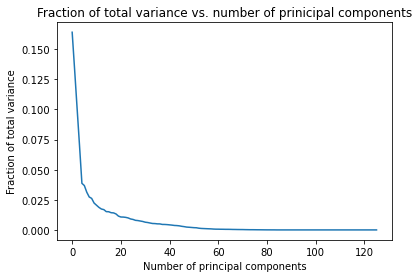

In [207]:
def P1():

### STUDENT START ###    
    #PCA analysis
    n_comp = 126
    pca_mod = PCA(n_components= n_comp)
    pca_mod.fit(train_data)

    #fraction of total variance explained by first k principal components
    k = [1, 2, 3, 4, 5, 10, 20, 30, 40, 50]
    cumsum = np.cumsum(pca_mod.explained_variance_ratio_)
    print("Fraction of the total variance explained by first...")
    for i in k:
        print("     %d principal component(s):" % i, cumsum[i])

    #plot of fraction of total variance
    plt.plot(pca_mod.explained_variance_ratio_)
    plt.title("Fraction of total variance vs. number of prinicipal components")
    plt.xlabel("Number of principal components")
    plt.ylabel("Fraction of total variance")
    plt.show()

### STUDENT END ###

P1()

### Part 2:

PCA can be very useful for visualizing data. Project the training data down to 2 dimensions and show as a square scatterplot. Show the positive (poisonous) examples in red and the negative (non-poisonous) examples in green. Here's a reference for plotting: http://matplotlib.org/users/pyplot_tutorial.html

Notes:
* You can use `PCA` to produce a PCA analysis.

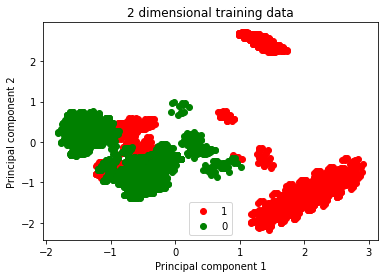

In [51]:
def P2():

### STUDENT START ###
    #PCA analysis
    n_comp = 2
    pca_mod2 = PCA(n_components= n_comp)
    train_2D = pca_mod2.fit(train_data).transform(train_data)

    #scatterplot of 2 dimmensional training data
    for lab, col in zip((1, 0),
                        ('red', 'green')):
        plt.scatter(train_2D[train_labels==lab, 0],
                    train_2D[train_labels==lab, 1],
                    label=lab,
                    c=col)
    plt.title("2 dimensional training data")
    plt.xlabel("Principal component 1")
    plt.ylabel("Principal component 2")
    plt.legend(loc='lower center')
    plt.show()

### STUDENT END ###

P2()

### Part 3:

Fit a k-means cluster model with 6 clusters over the 2d projected data. As in part 2, show as a square scatterplot with the positive (poisonous) examples in red and the negative (non-poisonous) examples in green.  For each cluster, mark the centroid and plot a circle that goes through the cluster's example that is most distant from the centroid.

Notes:
* You can use `KMeans` to produce a k-means cluster analysis.
* You can use `linalg.norm` to determine distance (dissimilarity) between observations.

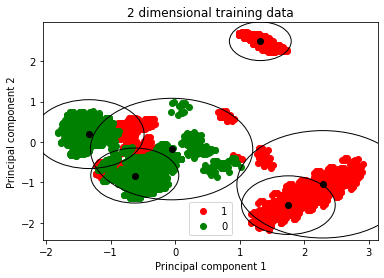

In [160]:
def P3():

### STUDENT START ###
    #k-means cluster model
    cluster_mod = KMeans(n_clusters=6, random_state=8)
    cluster_mod.fit(train_2D)

    #plot 2D training data
    for lab, col in zip((1, 0),
                        ('red', 'green')):
        plt.scatter(train_2D[train_labels==lab, 0],
                    train_2D[train_labels==lab, 1],
                    label=lab,
                    c=col)
    #plot centroids and cluster circles    
    plt.scatter(cluster_mod.cluster_centers_[:,0], cluster_mod.cluster_centers_[:,1], c='black')

    for i in np.unique(cluster_mod.labels_):
        max_radius = max(metrics.pairwise.euclidean_distances(train_2D[cluster_mod.labels_ == i], cluster_mod.cluster_centers_[i].reshape(1,-1)))
        plt.gca().add_artist(plt.Circle(cluster_mod.cluster_centers_[i],radius = max_radius, fill=False))

    #plot
    plt.title("2 dimensional training data")
    plt.xlabel("Principal component 1")
    plt.ylabel("Principal component 2")
    plt.legend(loc='lower center')
    plt.show()

### STUDENT END ###

P3()

### Part 4:

Fit Gaussian mixture models for the positive (poisonous) examples in your 2d projected data. Vary the number of mixture components from 1 to 4 and the covariance matrix type 'spherical', 'diag', 'tied', 'full' (that's 16 models).  Show square plots of the estimated density contours presented in a 4x4 grid - one row each for a number of mixture components and one column each for a convariance matrix type.  

Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.
* You can use `contour` in combination with other methods to plot contours, like in this example: http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#example-mixture-plot-gmm-pdf-py
* You can use `contour` without the `norm` and `levels` parameters. 

<Figure size 432x288 with 0 Axes>

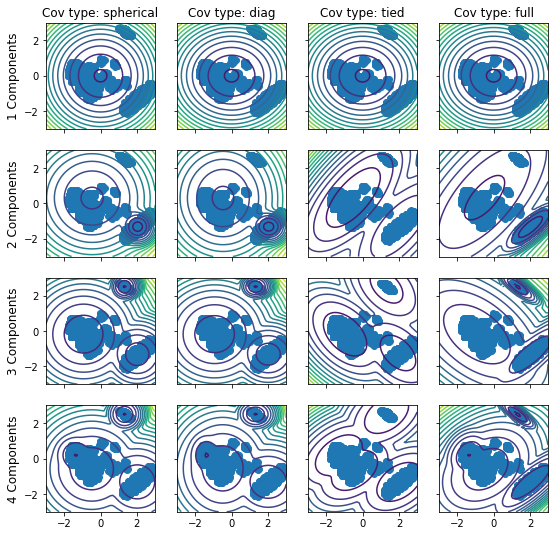

In [195]:
def P4():

### STUDENT START ###
    #setting up 4x4 figure
    fig = plt.figure()
    fig, ax_list = plt.subplots(nrows=4,ncols=4, sharex=True, sharey=True, figsize=(9,9))

    #setting up contour plots
    x = np.linspace(-3, 3)
    y = np.linspace(-3, 3)
    X, Y = np.meshgrid(x, y)
    XX = np.array([X.ravel(), Y.ravel()]).T

    #plotting scatter plots with density contours
    cov_types = ['spherical', 'diag', 'tied', 'full']

    for cv_type in cov_types:
        plt_column = cov_types.index(cv_type)
        for components in range(1,5):
            #Gaussian mixture model
            gm_mod = GaussianMixture(n_components=components, covariance_type=cv_type, random_state=12345)
            gm_mod.fit(train_2D)

            #Scatterplot of 2D training data
            ax_list[components-1,plt_column].scatter(train_2D[:, 0],train_2D[:, 1])

            #Estimated density contours
            Z = -gm_mod.score_samples(XX)
            Z = Z.reshape(X.shape)
            ax_list[components-1,plt_column].contour(X, Y, Z, 15)
            
    #formatting labels
    col_label = ['Cov type: {}'.format(col) for col in cov_types]
    row_label = ['{} Components'.format(row) for row in range(1,5)]

    for ax, col in zip(ax_list[0], col_label):
        ax.set_title(col)

    for ax, row in zip(ax_list[:,0], row_label):
        ax.set_ylabel(row, size='large')
        
### STUDENT END ###

P4()

### Part 5:

Fit two Gaussian mixture models, one for the positive examples and one for the negative examples in your 2d projected data. Use 4 mixture components and full convariance for each model.  Predict the test example labels by picking the labels corresponding to the larger of the two models' probabilities.  What is the accuracy of you predictions on the test data?

Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.
* You can use `GaussianMixture`'s `score_samples` method to find the probabilities.

In [230]:
def P5():

### STUDENT START ###
    #PCA analysis for test and train data
    n_comp = 2
    pca_mod5 = PCA(n_components= n_comp)
    train_2D = pca_mod5.fit_transform(train_data)
    test_2D = pca_mod5.transform(test_data)

    #creating 2 GMMs with positive and negative examples
    pos_train = train_2D[train_labels==1]
    neg_train  = train_2D[train_labels==0]

    pos_gm_mod = GaussianMixture(n_components=4, covariance_type="full", random_state=12345)
    pos_gm_mod.fit(pos_train)

    neg_gm_mod = GaussianMixture(n_components=4, covariance_type="full", random_state=12345)
    neg_gm_mod.fit(neg_train)

    #predicting test data using larger of two models' probabilities
    pos_probs = np.exp(pos_gm_mod.score_samples(test_2D))
    neg_probs = np.exp(neg_gm_mod.score_samples(test_2D))

    test_pred = (pos_probs > neg_probs) * 1

    #reporting accuracy
    accuracy = sum(test_pred == test_labels) / len(test_labels)
    print("Accuracy on test data:", accuracy)

### STUDENT END ###

P5()

Accuracy on test data: 0.9501779359430605


### Part 6:

Run a series of experiments to find the Gaussian mixture model that results in the best accuracy with no more than 50 parameters.  Do this by varying the number of PCA components, the number of GMM components, and the covariance type.

Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.


* For spherical, diag, and full covariance types:
  * number of parameters = (number of parameters per gmm component * number of gmm components - 1) * number of classes
  * number of parameters per gmm component includes all the means plus all the non-zero, non-duplicated values in the covariance matrix plus the mixing weight
  * Each mixing weight parameter indicates how much to weight a particular gmm component; the -1 above accounts for the fact that the mixing weights must sum to 1, so you do not need to include the last mixing weight as its own parameter


* To calculate the number of parameters for tied covariance type:
  * number of parameters = (number of parameters per class - 1) * number of classes
  * number of parameters per class includes all the means and mixing weights for all the gmm components plus all the non-zero, non-duplicated values in the one shared covariance matrix
  * Each mixing weight parameter indicates how much to weight a particular gmm component; the -1 above accounts for the fact that the mixing weights must sum to 1, so you do not need to include the last mixing weight as its own parameter

Top 50 GMM models (with no more than 50 parameters) by accuracy:


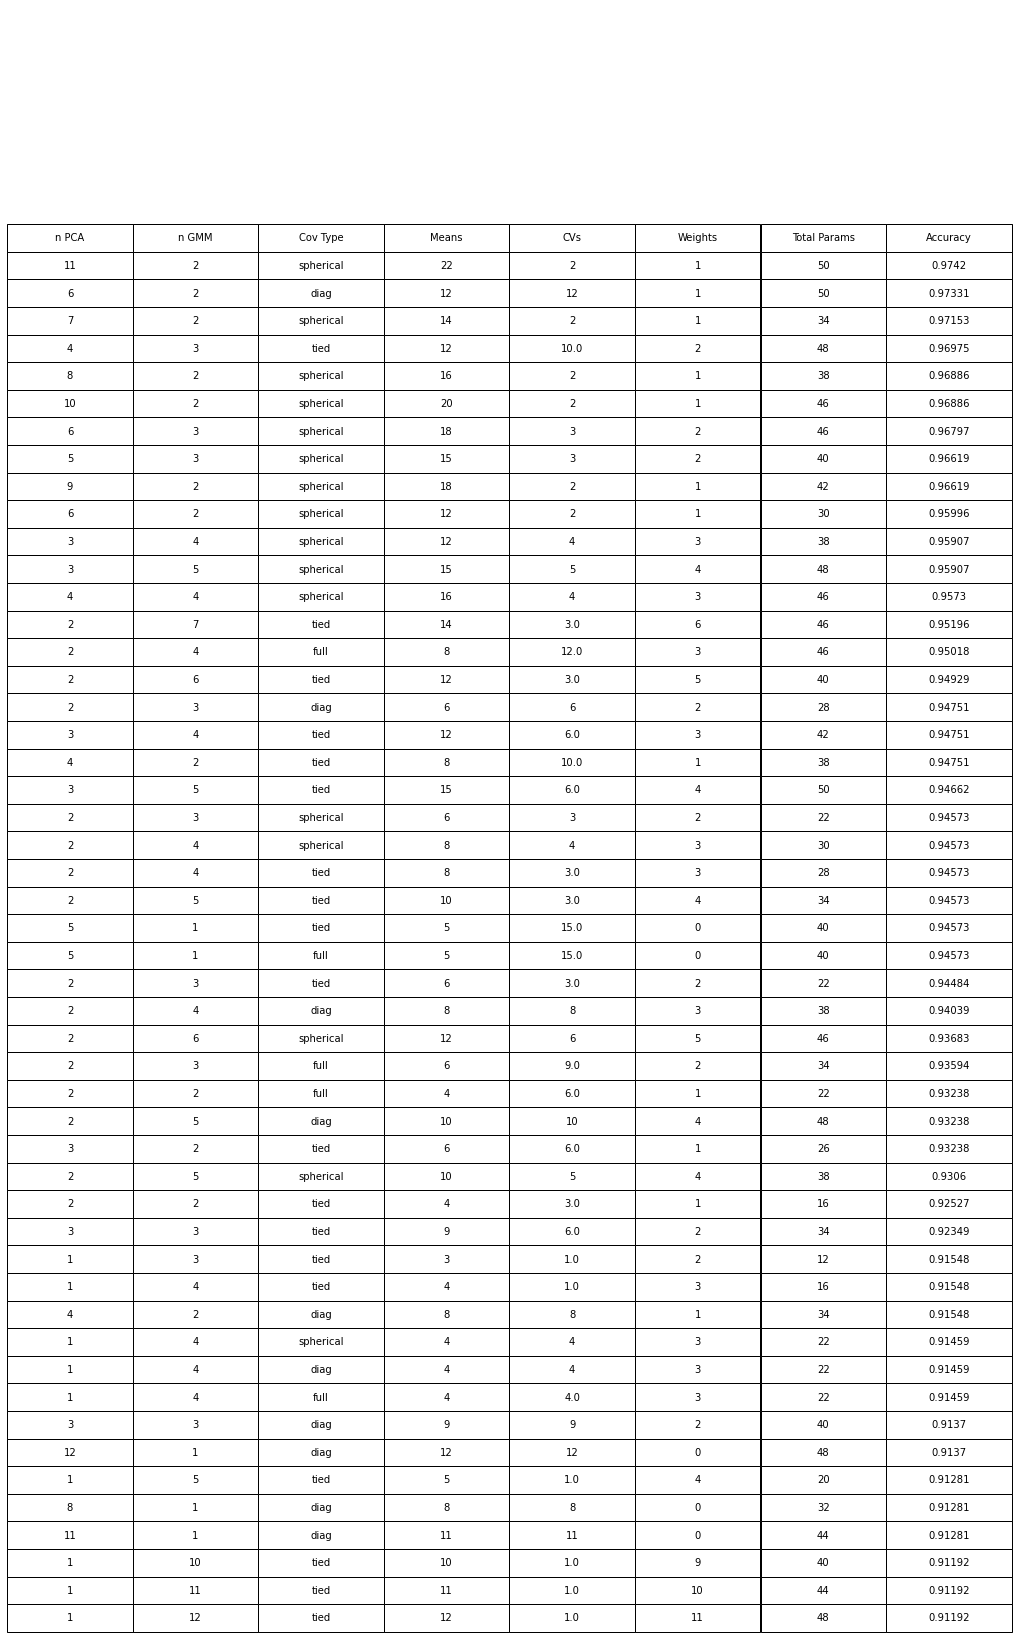

In [481]:
def P6():

### STUDENT START ###
    def gmm_experiment(pca_comp, gmm_comp, cv_type):
        """Function that builds a model for specified number of PCA components, number of GMM components, and covariance type."""
        #calculate number of covariance components
        if cv_type == "spherical":
            n_cov = gmm_comp

        elif cv_type == "tied":
            n_cov = pca_comp * (pca_comp+1) / 2

        elif cv_type == "diag":
            n_cov = gmm_comp * pca_comp

        elif cv_type == "full":
            n_cov = gmm_comp * (pca_comp * (pca_comp+1) / 2)

        #calculate number of total parameters
        means = gmm_comp * pca_comp
        weights = gmm_comp - 1
        params = (means + int(n_cov) + weights) * 2

        #build and evaluate models if number of total parameters is less than 50
        if params <= 50:
            #PCA analysis for test and train data
            pca_mod = PCA(n_components = pca_comp)
            train_ND = pca_mod.fit_transform(train_data)
            test_ND = pca_mod.transform(test_data)

            #creating 2 GMMs with positive and negative examples
            pos_train = train_ND[train_labels==1]
            neg_train  = train_ND[train_labels==0]

            pos_gm_mod = GaussianMixture(n_components=gmm_comp, covariance_type=cv_type, random_state=12345)
            pos_gm_mod.fit(pos_train)

            neg_gm_mod = GaussianMixture(n_components=gmm_comp, covariance_type=cv_type, random_state=12345)
            neg_gm_mod.fit(neg_train)

            #predicting test data using larger of two models' probabilities
            pos_probs = np.exp(pos_gm_mod.score_samples(test_ND))
            neg_probs = np.exp(neg_gm_mod.score_samples(test_ND))

            test_pred = (pos_probs > neg_probs) * 1

            #reporting accuracy and experiment parameters
            accuracy = round(sum(test_pred == test_labels) / len(test_labels),5)
            experiment = [pca_comp, gmm_comp, cv_type, means, n_cov, weights, params, accuracy] #to keep track of parameters of this experiment
            return experiment

    # varying the number of PCA components, the number of GMM components, and the covariance type for experiments
    all_models = []
    for n_pca in range(1,26):
        for n_gmm in range(1,26):
            for cv_type in cov_types:
                exper = gmm_experiment(n_pca, n_gmm, cv_type)
                all_models.append(exper)
    all_models = [i for i in all_models if i]

    #sorting for the top 50 models by accuracy
    top_models = sorted(all_models, key=lambda x: x[7], reverse=True)
    top_50 = top_models[:50]

    # create and format table
    print("Top 50 GMM models (with no more than 50 parameters) by accuracy:")
    col_labels = ['n PCA', 'n GMM', 'Cov Type', 'Means', 'CVs', 'Weights', 'Total Params', 'Accuracy']
    table = plt.table(cellText = top_50,
                      cellLoc = 'center',
                      colLabels = col_labels)
    table.scale(3,2.3)
    plt.axis('off')
    plt.show()

### STUDENT END ###

P6()